#### Model Trainnig

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#modeling
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings





In [4]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#Preparing X and Y variables

In [6]:
X=df.drop(columns=['math_score'],axis=1)

In [5]:
y=df['math_score']

In [7]:
#create column Transformer with 3 types of transforemers
num_features= X.select_dtypes(exclude='object').columns
cat_features= X.select_dtypes(include='object').columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_transformer = StandardScaler()

oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", num_transformer, num_features),
    ]
)




In [8]:
X=preprocessor.fit_transform(X)

In [9]:
#seprate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [11]:
X.shape

(1000, 19)

#### Create an Evaluate Function to give all metrics after model training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

models_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    models_train_mae, models_train_mse, models_train_rmse, models_train_r2 = evaluate_model(y_train, y_train_pred)
    models_test_mae, models_test_mse, models_test_rmse, models_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("MOdels performance for training set")
    print("-root mean squared error: {:.4f}".format(models_train_rmse))
    print("-mean absolute error: {:.4f}".format(models_train_mae))
    print("-r2 score: {:.4f}".format(models_train_r2))
    print("\n")

    print("MOdels performance for test set")
    print("-root mean squared error: {:.4f}".format(models_test_rmse))
    print("-mean absolute error: {:.4f}".format(models_test_mae))
    print("-r2 score: {:.4f}".format(models_test_r2))
    print("\n")

Linear Regression
MOdels performance for training set
-root mean squared error: 5.3255
-mean absolute error: 4.2685
-r2 score: 0.8742


MOdels performance for test set
-root mean squared error: 5.4009
-mean absolute error: 4.2184
-r2 score: 0.8801


Lasso
MOdels performance for training set
-root mean squared error: 6.5938
-mean absolute error: 5.2063
-r2 score: 0.8071


MOdels performance for test set
-root mean squared error: 6.5197
-mean absolute error: 5.1579
-r2 score: 0.8253


Ridge
MOdels performance for training set
-root mean squared error: 5.3233
-mean absolute error: 4.2650
-r2 score: 0.8743


MOdels performance for test set
-root mean squared error: 5.3904
-mean absolute error: 4.2111
-r2 score: 0.8806


Decision Tree
MOdels performance for training set
-root mean squared error: 0.2795
-mean absolute error: 0.0187
-r2 score: 0.9997


MOdels performance for test set
-root mean squared error: 8.0852
-mean absolute error: 6.4400
-r2 score: 0.7314


Random Forest
MOdels perform

In [22]:
#results
results=pd.DataFrame(list(zip(models_list,r2_list)),columns=['Model','R2_Score']).sort_values(by='R2_Score',ascending=False)
results

,Model,R2_Score


In [20]:
#Linear Regression
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100

print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 88.01


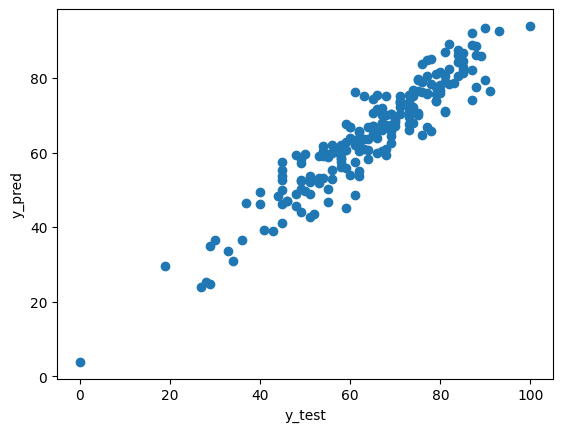

In [21]:
#plot y_test and y_pred
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()